# What makes people in a country happy?

# Cleaning

## Imports

In [57]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from scipy import stats


## Data Munging

In [58]:
year2015 = pd.read_csv('./data/2015.csv')
year2016 = pd.read_csv('./data/2016.csv')
year2017 = pd.read_csv('./data/2017.csv')
year2018 = pd.read_csv('./data/2018.csv')
year2019 = pd.read_csv('./data/2019.csv')

year2015['year'] = '2015'
year2016['year'] = '2016'
year2017['year'] = '2017'
year2018['year'] = '2018'
year2019['year'] = '2019'
year2019

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,year
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,2019
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,2019
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,2019
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,2019
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,2019
...,...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411,2019
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147,2019
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025,2019
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035,2019


In [59]:
data = pd.concat([year2015, year2016,year2017,year2018,year2019])
data.set_index(data['year'])

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),...,Trust..Government.Corruption.,Dystopia.Residual,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption
year,,,,,,,,,,,,,,,,,,,,,
2015,Switzerland,Western Europe,1.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015,Iceland,Western Europe,2.0,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015,Denmark,Western Europe,3.0,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015,Norway,Western Europe,4.0,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015,Canada,North America,5.0,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,152.0,Rwanda,3.334,0.359,0.711,0.614,0.555,0.411
2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,153.0,Tanzania,3.231,0.476,0.885,0.499,0.417,0.147
2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,154.0,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.025


In [66]:


df_2015 = pd.read_csv('./data/2015.csv')
df_2016 = pd.read_csv('./data/2016.csv')
df_2017 = pd.read_csv('./data/2017.csv')
df_2018 = pd.read_csv('./data/2018.csv')

def standardize_columns(df, year):
    df.columns = df.columns.str.replace('.', ' ').str.strip()
    df.rename(columns=standard_columns, inplace=True)
    df['Year'] = year 
    return df
standard_columns = {
    'Country or region': 'Country',
    'Overall rank': 'Happiness Rank',
    'Score': 'Happiness Score',
    'Happiness Score': 'Happiness Score',
    'Economy (GDP per Capita)': 'GDP per Capita',
    'Economy  GDP per Capita': 'GDP per Capita',
    'GDP per capita': 'GDP per Capita',
    'Family': 'Social Support',
    'Social support': 'Social Support',
    'Health (Life Expectancy)': 'Healthy Life Expectancy',
    'Health  Life Expectancy': 'Healthy Life Expectancy',
    'Healthy life expectancy': 'Healthy Life Expectancy',
    'Freedom': 'Freedom to Make Life Choices',
    'Freedom to make life choices': 'Freedom to Make Life Choices',
    'Trust (Government Corruption)': 'Perceptions of Corruption',
    'Trust  Government Corruption': 'Perceptions of Corruption',
    'Perceptions of corruption': 'Perceptions of Corruption',
}

df_2015 = standardize_columns(df_2015,2015)
df_2016 = standardize_columns(df_2016,2016)
df_2017 = standardize_columns(df_2017,2017)
df_2018 = standardize_columns(df_2018,2018)
common_cols = ['Country', 'Happiness Rank', 'Happiness Score', 'GDP per Capita', 'Social Support',
               'Healthy Life Expectancy', 'Freedom to Make Life Choices', 'Perceptions of Corruption', 'Generosity', 'Year']
df_2015 = df_2015[common_cols]
df_2016 = df_2016[common_cols]
df_2017 = df_2017[common_cols]
df_2018 = df_2018[common_cols]
df_merged = pd.concat([df_2015, df_2016, df_2017, df_2018], ignore_index=True)

for column in common_cols[1:-1]:
    if df_merged[column].isnull().any():
        df_merged[column].fillna(df_merged[column].mean(), inplace=True)
for column in common_cols[1:]:  
    df_merged[column] = df_merged[column].round(3)
df_merged


,Country,Happiness Rank,Happiness Score,GDP per Capita,Social Support,Healthy Life Expectancy,Freedom to Make Life Choices,Perceptions of Corruption,Generosity,Year
0,Switzerland,1,7.587,1.397,1.350,0.941,0.666,0.420,0.297,2015
1,Iceland,2,7.561,1.302,1.402,0.948,0.629,0.141,0.436,2015
2,Denmark,3,7.527,1.325,1.361,0.875,0.649,0.484,0.341,2015
3,Norway,4,7.522,1.459,1.331,0.885,0.670,0.365,0.347,2015
4,Canada,5,7.427,1.326,1.323,0.906,0.633,0.330,0.458,2015
...,...,...,...,...,...,...,...,...,...,...
621,Yemen,152,3.355,0.442,1.073,0.343,0.244,0.064,0.083,2018
622,Tanzania,153,3.303,0.455,0.991,0.381,0.481,0.097,0.270,2018
623,South Sudan,154,3.254,0.337,0.608,0.177,0.112,0.106,0.224,2018
624,Central African Republic,155,3.083,0.024,0.000,0.010,0.305,0.038,0.218,2018


AttributeError: 'Series' object has no attribute 'iteritems'

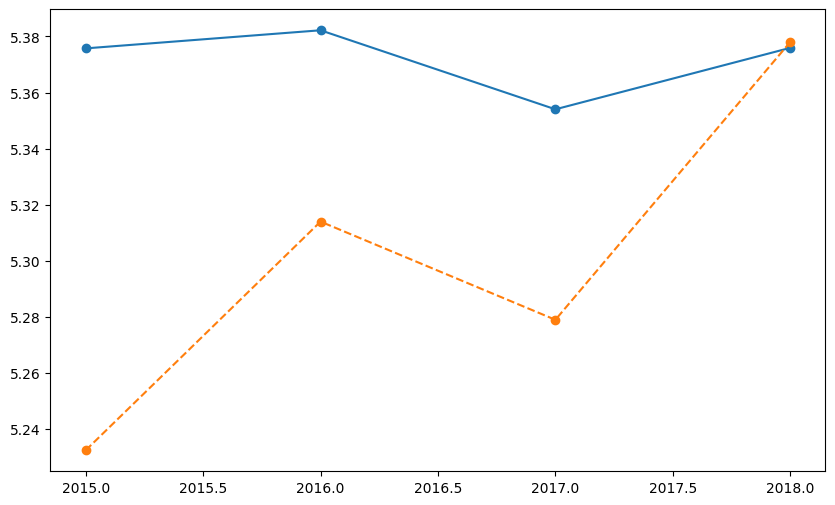

In [69]:

# Adjusted get_mode function to handle cases where no mode is found
def get_mode(series):
    mode_result = stats.mode(series)
    # Check if the count of the most common value is greater than 0 to ensure there is at least one mode
    if mode_result.count.size > 0 and mode_result.count[0] > 0:
        return mode_result.mode[0]
    return None  # Return None if no mode or mode count is 0

# Example DataFrame setup (you should replace this with your actual DataFrame preparation)
# df_merged = pd.DataFrame()  # Ensure df_merged is properly prepared with 'Year' and 'Happiness Score' columns

# Assuming df_merged is prepared with 'Year' and 'Happiness Score' correctly populated
central_tendencies = df_merged.groupby('Year')['Happiness Score'].agg(['mean', 'median'])
central_tendencies['mode'] = df_merged.groupby('Year')['Happiness Score'].apply(get_mode)

# Plotting central tendencies over the years
plt.figure(figsize=(10, 6))
plt.plot(central_tendencies.index, central_tendencies['mean'], marker='o', linestyle='-', label='Mean Happiness Score')
plt.plot(central_tendencies.index, central_tendencies['median'], marker='o', linestyle='--', label='Median Happiness Score')
for year, mode in central_tendencies['mode'].items():
    if mode is not None:  # Only plot mode if it's not None
        plt.scatter(year, mode, color='red', label='Mode Happiness Score' if year == central_tendencies.index[0] else "")

plt.title('Central Tendencies of Happiness Score Over the Years')
plt.xlabel('Year')
plt.ylabel('Happiness Score')
plt.legend()
plt.grid(True)
plt.show()